In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]

Text(0.5, 1.0, 'boxplot')

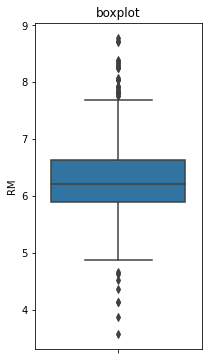

In [4]:
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['RM'])
plt.title('boxplot')

In [5]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundry = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundry = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundry, lower_boundry

In [7]:
upper_boundry, lower_boundry = find_boundaries(boston, 'RM', 1.5)
print(upper_boundry, lower_boundry)

7.730499999999999 4.778500000000001


In [8]:
outliers = np.where(boston['RM'] > upper_boundry, True, np.where(boston['RM'] < lower_boundry, True, False))

In [9]:
outliers_df = boston.loc[outliers, 'RM']
outliers_df.head()

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
Name: RM, dtype: float64

In [10]:
# remove outliers with boston.loc[~outliers, 'RM']